Luxury loan portfolio in NYC

https://www.kaggle.com/datasets/anandaramg/luxury-loan-portfolio?resource=download

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# Load the dataset
raw_data =pd.read_csv('/content/drive/MyDrive/machine Learning 6th sem lab/LuxuryLoanPortfolio.csv')

In [ ]:
raw_data.head()

,loan_id,funded_amount,funded_date,duration years,duration months,10 yr treasury index date funded,interest rate percent,interest rate,payments,total past payments,...,BUILDING CLASS AT PRESENT,ADDRESS 1,ADDRESS 2,ZIP CODE,CITY,STATE,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE
0,LL0000076,790000.0,2012-04-27,20,240,1.96,3.359,0.03359,4524.65,92,...,R1,171 SOUTH 9TH STREET,9,10001,New York City,NY,1,0,0,2
1,LL0000151,1720000.0,2014-10-14,15,180,2.21,3.508,0.03508,12302.74,62,...,R3,1242 E 80TH ST,19,10104,New York City,NY,1,0,0,1
2,LL0000161,3720000.0,2014-06-07,15,180,2.60,3.896,0.03896,27322.92,66,...,R3,1884 53RD STREET,2,10029,New York City,NY,1,0,0,1
3,LL0000175,1079000.0,2012-02-23,20,240,1.99,3.389,0.03389,6196.40,94,...,R1,79 EAGLE STREET,6,10010,New York City,NY,1,0,0,2
4,LL0000178,2028000.0,2016-04-01,20,240,1.79,3.188,0.03188,11439.05,45,...,RW,34 NORTH 7TH STREET,5,10172,New York City,NY,1,0,0,4


In [ ]:
# the number of rows and columns in the dataset
raw_data.shape

(1678, 32)

In [ ]:
# view the unique elements in wach column
raw_data.nunique()

loan_id                             1678
funded_amount                        507
funded_date                         1256
duration years                         4
duration months                        4
10 yr treasury index date funded     338
interest rate percent                661
interest rate                        662
payments                            1661
total past payments                   97
loan balance                        1675
property value                      1635
purpose                                5
firstname                            952
middlename                           777
lastname                            1034
social                              1678
phone                               1678
title                                870
employment length                     18
BUILDING CLASS CATEGORY               24
TAX CLASS AT PRESENT                   8
BUILDING CLASS AT PRESENT             46
ADDRESS 1                           1309
ADDRESS 2       

In [ ]:
# in the above list we can see that there are many features which has more number of unique values 
# for example features 'social' and 'phone' all the rows has unique values in it 
# these feratures will not be usefull for the machine to learn a concept 
# so we will delete these following feature
# [firstname, middlename, lastname]
# loan_id, phone, social 
# duration years and duration months are the same so we can get rid of one of them
# interest rate
# As there are just high-status titles we can drop that too
# Addresses too as we will leave the zip code


raw_data = raw_data.drop(['firstname', 'middlename', 'lastname', 'loan_id', 'phone', 'social', 'duration months', 'interest rate', 'title', 'ADDRESS 1', 'ADDRESS 2','CITY','STATE'], axis = 1)


In [ ]:
raw_data.head()

,funded_amount,funded_date,duration years,10 yr treasury index date funded,interest rate percent,payments,total past payments,loan balance,property value,purpose,employment length,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE
0,790000.0,2012-04-27,20,1.96,3.359,4524.65,92,373732.18,930250.0,boat,6,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,10001,1,0,0,2
1,1720000.0,2014-10-14,15,2.21,3.508,12302.74,62,957230.24,1995250.0,boat,10,04 TAX CLASS 1 CONDOS,1A,R3,10104,1,0,0,1
2,3720000.0,2014-06-07,15,2.60,3.896,27322.92,66,1916687.35,3881700.0,boat,1,04 TAX CLASS 1 CONDOS,1A,R3,10029,1,0,0,1
3,1079000.0,2012-02-23,20,1.99,3.389,6196.40,94,496538.75,1402450.0,boat,17,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,10010,1,0,0,2
4,2028000.0,2016-04-01,20,1.79,3.188,11439.05,45,1513242.57,2216500.0,boat,5,49 CONDO WAREHOUSES/FACTORY/INDUS,4,RW,10172,1,0,0,4


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   funded_amount                     1678 non-null   float64
 1   funded_date                       1678 non-null   object 
 2   duration years                    1678 non-null   int64  
 3   10 yr treasury index date funded  1678 non-null   float64
 4   interest rate percent             1678 non-null   float64
 5   payments                          1678 non-null   float64
 6   total past payments               1678 non-null   int64  
 7   loan balance                      1678 non-null   float64
 8   property value                    1678 non-null   float64
 9   purpose                           1678 non-null   object 
 10  employment length                 1678 non-null   int64  
 11  BUILDING CLASS CATEGORY           1678 non-null   object 
 12  TAX CL

In [ ]:
#As there are only 5 purposes we should transform them in numerical values(1 - boat, 2 - investment property, 3 - commercial property, 4 - home, 5 - plane)
purpose_map = {'boat': 1,
               'investment property': 2,
               'commerical property': 3,
               'home': 4,
               'plane': 5}

raw_data['purpose'] = raw_data['purpose'].map(purpose_map)

In [ ]:


#We should transform the tax class at present column in categorical values too
tax_class_map = {'1': 1,
                 '2': 2,
                 '1A': 3,
                 '1C': 4,
                 '2A': 5,
                 '2B': 6,
                 '2C': 7,
                 '4': 8}
raw_data['TAX CLASS AT PRESENT'] = raw_data['TAX CLASS AT PRESENT'].replace(tax_class_map)

In [ ]:
'''#Transform tax class at time of sale to have the same values as tax class at present
raw_data['TAX CLASS AT TIME OF SALE'] = raw_data['TAX CLASS AT TIME OF SALE'].replace(4, 8)'''

"#Transform tax class at time of sale to have the same values as tax class at present\nraw_data['TAX CLASS AT TIME OF SALE'] = raw_data['TAX CLASS AT TIME OF SALE'].replace(4, 8)"

In [ ]:
'''#We will use the get_dummies method to classify the building classes
building_class_dummies = pd.get_dummies(raw_data['BUILDING CLASS AT PRESENT'])
raw_data = pd.concat([raw_data, building_class_dummies], axis=1)
raw_data = raw_data.drop(['BUILDING CLASS AT PRESENT'], axis=1)

building_class_category_dummies = pd.get_dummies(raw_data['BUILDING CLASS CATEGORY'])
raw_data = pd.concat([raw_data, building_class_category_dummies], axis=1)
raw_data = raw_data.drop(['BUILDING CLASS CATEGORY'], axis=1)'''

from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()
raw_data['BUILDING CLASS AT PRESENT'] = Le.fit_transform(raw_data['BUILDING CLASS AT PRESENT'])
raw_data['BUILDING CLASS CATEGORY'] = Le.fit_transform(raw_data['BUILDING CLASS CATEGORY'])


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   funded_amount                     1678 non-null   float64
 1   duration years                    1678 non-null   int64  
 2   10 yr treasury index date funded  1678 non-null   float64
 3   interest rate percent             1678 non-null   float64
 4   payments                          1678 non-null   float64
 5   total past payments               1678 non-null   int64  
 6   loan balance                      1678 non-null   float64
 7   property value                    1678 non-null   float64
 8   purpose                           1678 non-null   int64  
 9   employment length                 1678 non-null   int64  
 10  BUILDING CLASS CATEGORY           1678 non-null   int64  
 11  TAX CLASS AT PRESENT              1678 non-null   int64  
 12  BUILDI

In [ ]:
#We can see that in these column is a '-'value so my guess is that we can replace this with '0'
raw_data['LAND SQUARE FEET'] = raw_data['LAND SQUARE FEET'].replace(' -  ', '0')
raw_data['GROSS SQUARE FEET'] = raw_data['GROSS SQUARE FEET'].replace(' -  ', '0')

In [ ]:
#Transforming these columns in numeric data type
raw_data['LAND SQUARE FEET'] = pd.to_numeric(raw_data['LAND SQUARE FEET'])
raw_data['GROSS SQUARE FEET'] = pd.to_numeric(raw_data['GROSS SQUARE FEET'])

In [ ]:
#A little feature engineering on the funded_date as it is quite important
raw_data['funded_date'] = pd.to_datetime(raw_data['funded_date'], format='%Y-%m-%d')
raw_data['funded_year'] = raw_data['funded_date'].dt.year
raw_data['funded_month'] = raw_data['funded_date'].dt.month
raw_data = raw_data.drop(['funded_date'], axis=1)

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   funded_amount                     1678 non-null   float64
 1   duration years                    1678 non-null   int64  
 2   10 yr treasury index date funded  1678 non-null   float64
 3   interest rate percent             1678 non-null   float64
 4   payments                          1678 non-null   float64
 5   total past payments               1678 non-null   int64  
 6   loan balance                      1678 non-null   float64
 7   property value                    1678 non-null   float64
 8   purpose                           1678 non-null   int64  
 9   employment length                 1678 non-null   int64  
 10  BUILDING CLASS CATEGORY           1678 non-null   int64  
 11  TAX CLASS AT PRESENT              1678 non-null   int64  
 12  BUILDI

In [ ]:
raw_data = raw_data.drop(["duration years","10 yr treasury index date funded","interest rate percent","total past payments","purpose","employment length","ZIP CODE","TOTAL UNITS","GROSS SQUARE FEET","funded_year","funded_month"],axis=1)

In [ ]:
raw_data.corr()["TAX CLASS AT TIME OF SALE"]

funded_amount                0.101161
payments                     0.096184
loan balance                 0.094952
property value               0.102668
BUILDING CLASS CATEGORY      0.816963
TAX CLASS AT PRESENT         0.542572
BUILDING CLASS AT PRESENT    0.180779
LAND SQUARE FEET             0.084873
TAX CLASS AT TIME OF SALE    1.000000
Name: TAX CLASS AT TIME OF SALE, dtype: float64

In [ ]:
raw_data.head()

,funded_amount,payments,loan balance,property value,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,LAND SQUARE FEET,TAX CLASS AT TIME OF SALE
0,790000.0,4524.65,373732.18,930250.0,11,2,23,0,2
1,1720000.0,12302.74,957230.24,1995250.0,3,1,25,0,1
2,3720000.0,27322.92,1916687.35,3881700.0,3,1,25,0,1
3,1079000.0,6196.40,496538.75,1402450.0,11,2,23,0,2
4,2028000.0,11439.05,1513242.57,2216500.0,23,4,38,0,4


In [ ]:
#Defining the attributes and labels
data_X = raw_data.drop(['TAX CLASS AT TIME OF SALE'], axis=1)
data_Y = raw_data['TAX CLASS AT TIME OF SALE']

In [ ]:
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,precision_recall_fscore_support,mean_absolute_error,mean_squared_error
from scipy.stats import randint as sp_randint
from sklearn.model_selection import cross_val_score

In [ ]:
#Spliting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.15 , random_state=42)

In [ ]:
# Create a random forest classifier object
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid
param_dist = {'n_estimators': sp_randint(10, 200),
              'max_depth': sp_randint(1, 50),
              'max_features': ['sqrt', 'log2'],
              'min_samples_split': sp_randint(2, 20),
              'min_samples_leaf': sp_randint(1, 10),
              'criterion': ['gini', 'entropy']}

# Perform a randomized search with 5-fold cross-validation
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist,
                                   n_iter=100, cv=5, random_state=42, n_jobs=-1)

# Fit the randomized search object to the data
random_search.fit(X_train, Y_train)

# Print the best hyperparameters and the corresponding accuracy
print('Best hyperparameters:', random_search.best_params_)
print('Best accuracy:', random_search.best_score_)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 44, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 11, 'n_estimators': 197}
Best accuracy: 1.0


In [ ]:
# Perform feature scaling and normalization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

logistic regression


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg = LogisticRegression()
lg.fit(X_train , Y_train)

LogisticRegression()

In [ ]:
# Evaluate the model
y_pred = lg.predict(X_test)
accuracy = accuracy_score(Y_test , y_pred)
precision,recall,f1, s=precision_recall_fscore_support(Y_test , y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print(precision)
print(recall)
print(f1)

Accuracy: 100.00%
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]


In [ ]:
scores = cross_val_score(lg, X_test, Y_test, cv=5)
print(scores)

[0.94117647 1.         1.         0.98       1.        ]


In [ ]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5 )  
classifier.fit(X_train, Y_train)  

KNeighborsClassifier()

In [ ]:
Y_train.nunique()

3

In [ ]:
#Predicting the test set result  
y_pred_knn= classifier.predict(X_test)

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(Y_test, y_pred_knn)
print(cm)

[[ 46   1   0]
 [  0 196   0]
 [  0   0   9]]


In [ ]:
accuracy = accuracy_score(Y_test, y_pred_knn)
print(accuracy)

0.996031746031746


In [ ]:
Y_test.nunique()

3

In [ ]:
#predict the interest rates
absolute_mean = 0
squared_mean = 0

for _ in range(1, 11):
    model = RandomForestRegressor()
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    absolute_mean += mean_absolute_error(Y_test, pred)
    squared_mean +=  mean_squared_error(Y_test, pred)

print(absolute_mean / 10)
print(squared_mean / 10) 

0.0010396825396825396
0.0002861904761904762


In [ ]:
print(X_train)

[[-0.12299534  0.47263078  0.857069   ... -0.50124796  1.46641183
  -1.03031551]
 [-0.01318773  0.47263078 -0.05651895 ... -0.50124796 -0.26404014
   1.29171732]
 [ 0.02913811  0.47263078  1.81633635 ... -0.50124796  1.03379884
  -0.44980731]
 ...
 [-0.06110378  0.47263078  0.62912881 ... -0.06868697  0.60118585
  -1.03031551]
 [-0.21443514  0.47263078  0.9027484  ...  0.53588658  1.46641183
  -1.32056962]
 [-0.12698835 -2.21362101 -0.7873893  ... -0.50124796  1.46641183
   1.58197143]]


In [ ]:
# Train the random forest model
rf_classifier = RandomForestClassifier(criterion= 'entropy', max_depth=44, max_features='sqrt', min_samples_leaf=1, min_samples_split=11, n_estimators= 197)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=44, min_samples_split=11,
                       n_estimators=197)

In [ ]:
# Evaluate the model
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(Y_test , y_pred)
precision,recall,f1, s=precision_recall_fscore_support(Y_test , y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print(precision)
print(recall)
print(f1)

Accuracy: 100.00%
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]


In [ ]:
raw_data.corr()["TAX CLASS AT TIME OF SALE"]

funded_amount                0.101161
payments                     0.096184
loan balance                 0.094952
property value               0.102668
BUILDING CLASS CATEGORY      0.816963
TAX CLASS AT PRESENT         0.542572
BUILDING CLASS AT PRESENT    0.180779
LAND SQUARE FEET             0.084873
TAX CLASS AT TIME OF SALE    1.000000
Name: TAX CLASS AT TIME OF SALE, dtype: float64

In [ ]:
print(y_pred)

[2 2 2 1 4 2 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 4 2 1 2 2 1 1 2 2 2 1 2 2 2 2 1
 2 2 2 1 1 2 2 2 2 2 2 2 1 1 2 2 1 1 2 2 2 2 2 1 1 2 2 4 2 1 2 2 2 1 2 1 2
 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 1 2 2 2 1 2 2 2 2 2 1 2 2 1 2 2 2 2 2
 2 1 4 1 1 2 1 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 1 4 1 2 2 2 2 2 2 2 2 4 2 2 2
 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 1 2 2 4 2 2
 2 2 2 2 2 2 4 2 2 2 2 2 2 2 1 2 4 2 2 2 1 2 2 1 1 2 2 2 2 2]


In [ ]:
print(Y_test)

1601    2
482     2
203     2
49      1
1290    4
       ..
1128    2
963     2
1383    2
416     2
170     2
Name: TAX CLASS AT TIME OF SALE, Length: 252, dtype: int64


In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
log_prob_test=lg.predict_proba(X_test)[:,1]
log_prob_train=lg.predict_proba(X_train)[:,1]

In [ ]:
log_precision_test, log_recall_test , t= precision_recall_curve(Y_test, log_prob_test)
log_precision_train, log_recall_train, t=precision_recall_curve(Y_train, log_prob_train)
plt.plot(log_recall_test, log_precision_test, color='yellow')
plt.plot(log_recall_train, log_precision_train, color='green')
plt.legend(['Test Data', 'Train Data'])
plt.title("Precision vs Recall Plot")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

NameError: ignored

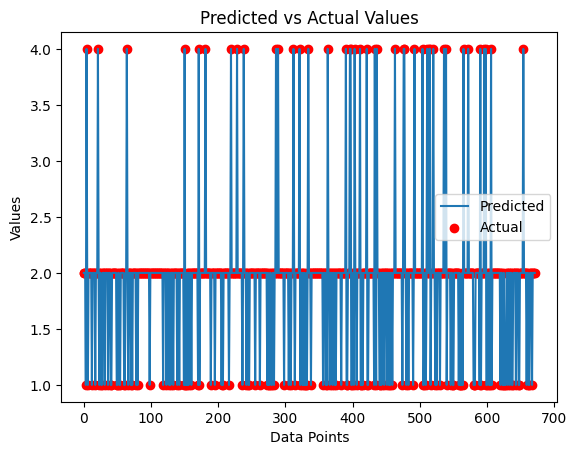

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_pred and y_actual contain the predicted and actual values respectively

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the predicted values as a line plot
ax.plot(y_pred, label='Predicted')

# Plot the actual values as a scatter plot
ax.scatter(range(len(Y_test)), Y_test, label='Actual', color='red')

# Set labels and title
ax.set_xlabel('Data Points')
ax.set_ylabel('Values')
ax.set_title('Predicted vs Actual Values')

# Add a legend
ax.legend()

# Show the plot
plt.show()